<a href="https://colab.research.google.com/github/nileshmalode11/Cuisine-classification/blob/main/Multilabel_cuisine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statement**


**We have dataset with category as one of feature in the dataset.This feature give information about the type of cuisine.This feature consist of various names of resturants and there cuisine type, this dataset is multiclass and multilabel,here we have to perform classification task on it to classifiy the names of cuisine from dataset.Here we have to classify which resturant serving which cuisine type and at the end we have to list it down the cuisines in the dataset.**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import plotly.graph_objects as go

## **Importing Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datafiniti_Fast_Food_Restaurants_May19.csv")


## **Data Understanding**

In [ ]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [ ]:
df.shape


(10000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [ ]:
df.describe(include = "all")

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000,9918
unique,10000,9455,9327,9954,5670,1,2810,1,10000,NaN,NaN,1545,5310,47,10000,6215
top,AWrSh_KgsVYjT2BJAzaH,2017-06-19T15:23:44Z,2019-04-14T06:22:30Z,2005 Kalia Rd,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Columbus,US,us/co/greeley/255511thavenue/554191587,NaN,NaN,McDonald's,37040,OH,https://www.yellowpages.com/greeley-co/mip/car...,http://www.subway.com
freq,1,5,9,4,182,10000,105,10000,1,NaN,NaN,765,17,922,1,393
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.298215,-93.284547,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.566995,16.421424,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.639560,-159.464310,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.850652,-98.342758,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.490189,-86.677452,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.808905,-81.803061,NaN,NaN,NaN,NaN,NaN


**Checking Null Values**

In [ ]:
df.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
sourceURLs            0
websites             82
dtype: int64

In [ ]:
df["dateAdded"].duplicated().sum()

545

In [ ]:
df.nunique()

id                   10000
dateAdded             9455
dateUpdated           9327
address               9954
categories            5670
primaryCategories        1
city                  2810
country                  1
keys                 10000
latitude              9870
longitude             9886
name                  1545
postalCode            5310
province                47
sourceURLs           10000
websites              6215
dtype: int64

**Checking Info Of Target Variable**

In [ ]:
df["categories"]

0       Fast Food Restaurants,Hamburgers and Hot Dogs,...
1       Restaurant,Mexican Restaurants,Fast Food Resta...
2       Sandwich Shops,Fast Food Restaurants,Restauran...
3       Fast Food Restaurants,Mexican Restaurants,Rest...
4       Fast Food Restaurants,Mexican Restaurants,Rest...
                              ...                        
9995    American Restaurants,Caterers,Soul Food Restau...
9996    Mexican Restaurants,Caterers,Delicatessens,Iri...
9997    Carry-out food,Hot dog restaurants,Fast Food R...
9998    Carry-out food,Caterers,Restaurant delivery se...
9999                     Fast Food Restaurant,Restaurants
Name: categories, Length: 10000, dtype: object

**Combining Fetaures**

In [ ]:
# address, city, country, lattitude, longitude, name, postal code, province, website
df["detailed_adress"]=df["name"]+df["address"]+df["city"]+df["country"]+df["latitude"].astype(str) +df["postalCode"]+["province"]+df["websites"]

In [ ]:
df["detailed_adress"]

0       Carl's Jr.2555 11th AvenueGreeleyUS40.39629806...
1       Del Taco2513 Highway 6 And 50Grand JunctionUS3...
2       Which Wich1125 Patterson RoadGrand JunctionUS3...
3       Chipotle Mexican Grill3455 N Salida CourtAuror...
4       Taco Bell5225 E Colfax AvenueDenverUS39.740448...
                              ...                        
9995    Church's Chicken Of Birmingham1803 Carolina Av...
9996    Luxury Box8511 Cantilever Way Ste 105RaleighUS...
9997    McDonald's2601 Plover RdPloverUS44.4531854467p...
9998    Pizza Hut170 E Main StHendersonvilleUS36.30826...
9999    Burger King3400 Westgate DriveDurhamUS35.96586...
Name: detailed_adress, Length: 10000, dtype: object

**Final Required Datafram**

In [ ]:
data = df[["detailed_adress","categories"]]

In [ ]:
data.head()

,detailed_adress,categories
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629806...,"Fast Food Restaurants,Hamburgers and Hot Dogs,..."
1,Del Taco2513 Highway 6 And 50Grand JunctionUS3...,"Restaurant,Mexican Restaurants,Fast Food Resta..."
2,Which Wich1125 Patterson RoadGrand JunctionUS3...,"Sandwich Shops,Fast Food Restaurants,Restauran..."
3,Chipotle Mexican Grill3455 N Salida CourtAuror...,"Fast Food Restaurants,Mexican Restaurants,Rest..."
4,Taco Bell5225 E Colfax AvenueDenverUS39.740448...,"Fast Food Restaurants,Mexican Restaurants,Rest..."


**Converting The Detailed adress Feature In Lower Case**

In [ ]:
data["detailed_adress"]=data["detailed_adress"].astype(str).map(lambda x:x.lower())

<ipython-input-15-84c1a96e4f1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["detailed_adress"]=data["detailed_adress"].astype(str).map(lambda x:x.lower())


**Convrting The Categories Feature In Lower Case**

In [ ]:
data["categories"]=data["categories"].map(lambda x:x.lower())

<ipython-input-16-1668f6c876fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["categories"]=data["categories"].map(lambda x:x.lower())


**Create Dummy Features Based On Type Of Cuiesins From The Dataset**

In [ ]:
new_df = pd.concat([data.drop('categories', 1), data['categories'].str.get_dummies(sep=",")], 1)
new_df

<ipython-input-17-8085b22bf24a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = pd.concat([data.drop('categories', 1), data['categories'].str.get_dummies(sep=",")], 1)
<ipython-input-17-8085b22bf24a>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_df = pd.concat([data.drop('categories', 1), data['categories'].str.get_dummies(sep=",")], 1)


,detailed_adress,american restaurant,and airport,and airport devonshire,and american restaurant,and american restaurant canoga park,and american restaurant cape fear,and american restaurant downtown blacksburg,and asian restaurant,and bakery,...,wings joint,wings joint and bbq joint,wings joint and fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,carl's jr.2555 11th avenuegreeleyus40.39629806...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco2513 highway 6 and 50grand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,which wich1125 patterson roadgrand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chipotle mexican grill3455 n salida courtauror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,taco bell5225 e colfax avenuedenverus39.740448...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,church's chicken of birmingham1803 carolina av...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,luxury box8511 cantilever way ste 105raleighus...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,mcdonald's2601 plover rdploverus44.4531854467p...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,pizza hut170 e main sthendersonvilleus36.30826...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.shape

(10000, 1561)

**Removing The And Word From The Features**

In [ ]:
# Removing 'and' from column names
new_df.columns = [col.replace('and', '') for col in new_df.columns]

In [ ]:
new_df.head()

,detailed_adress,american restaurant,airport,airport devonshire,american restaurant,american restaurant canoga park,american restaurant cape fear,american restaurant downtown blacksburg,asian restaurant,bakery,...,wings joint,wings joint bbq joint,wings joint fried chicken joint,wings joint cypress station,women's clothing,wy\\mexican restaurant,yogurt,yogurt manufacturers,youngstown restaurants,yuma restaurants
0,carl's jr.2555 11th avenuegreeleyus40.39629806...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco2513 highway 6 and 50grand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,which wich1125 patterson roadgrand junctionus3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chipotle mexican grill3455 n salida courtauror...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,taco bell5225 e colfax avenuedenverus39.740448...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.duplicated().value_counts()

False    9991
True        9
dtype: int64

In [ ]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = new_df.columns[1:]
bar_plot['count'] = new_df.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,american restaurants,3962


In [ ]:
top_10_cat=bar_plot.nlargest(n=10,columns=["count"])
top_10_cat

,cat,count
0,restaurants,9199
1,fast food restaurants,6885
2,restaurant,4489
3,take out restaurants,4405
4,american restaurants,3962
5,carry-out food,3644
6,fast food restaurant,3186
7,fast food,2733
8,swich shops,2714
9,hamburgers hot dogs,1900


In [ ]:
threshold = 500
colors = px.colors.qualitative.Plotly
fig = go.Figure(
    data=[
        go.Bar(
            x=top_10_cat['cat'],
            y=top_10_cat['count'],
            marker=dict(color=colors),
        )
    ]
)
fig.add_shape(
    type="line",
    x0=-0.5,
    y0=threshold,
    x1=len(top_10_cat) - 0.5,
    y1=threshold,
    line=dict(color="red", dash="dash"),
)
fig.update_layout(
    title="Most Common Categories",
    xaxis=dict(tickangle=-45),
    yaxis=dict(title="Number of Titles"),
    showlegend=False,
)
fig.show()

In [ ]:
main_categories = pd.DataFrame()
main_categories = bar_plot[bar_plot['count']>200]
categories = main_categories['cat'].values
categories = np.append(categories,'Others')
not_category = []
new_df['Others'] = 0

for i in new_df.columns[1:]:
    if i not in categories:
        new_df['Others'][new_df[i] == 1] = 1
        not_category.append(i)

new_df.drop(not_category, axis=1, inplace=True)

<ipython-input-25-487845392db4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



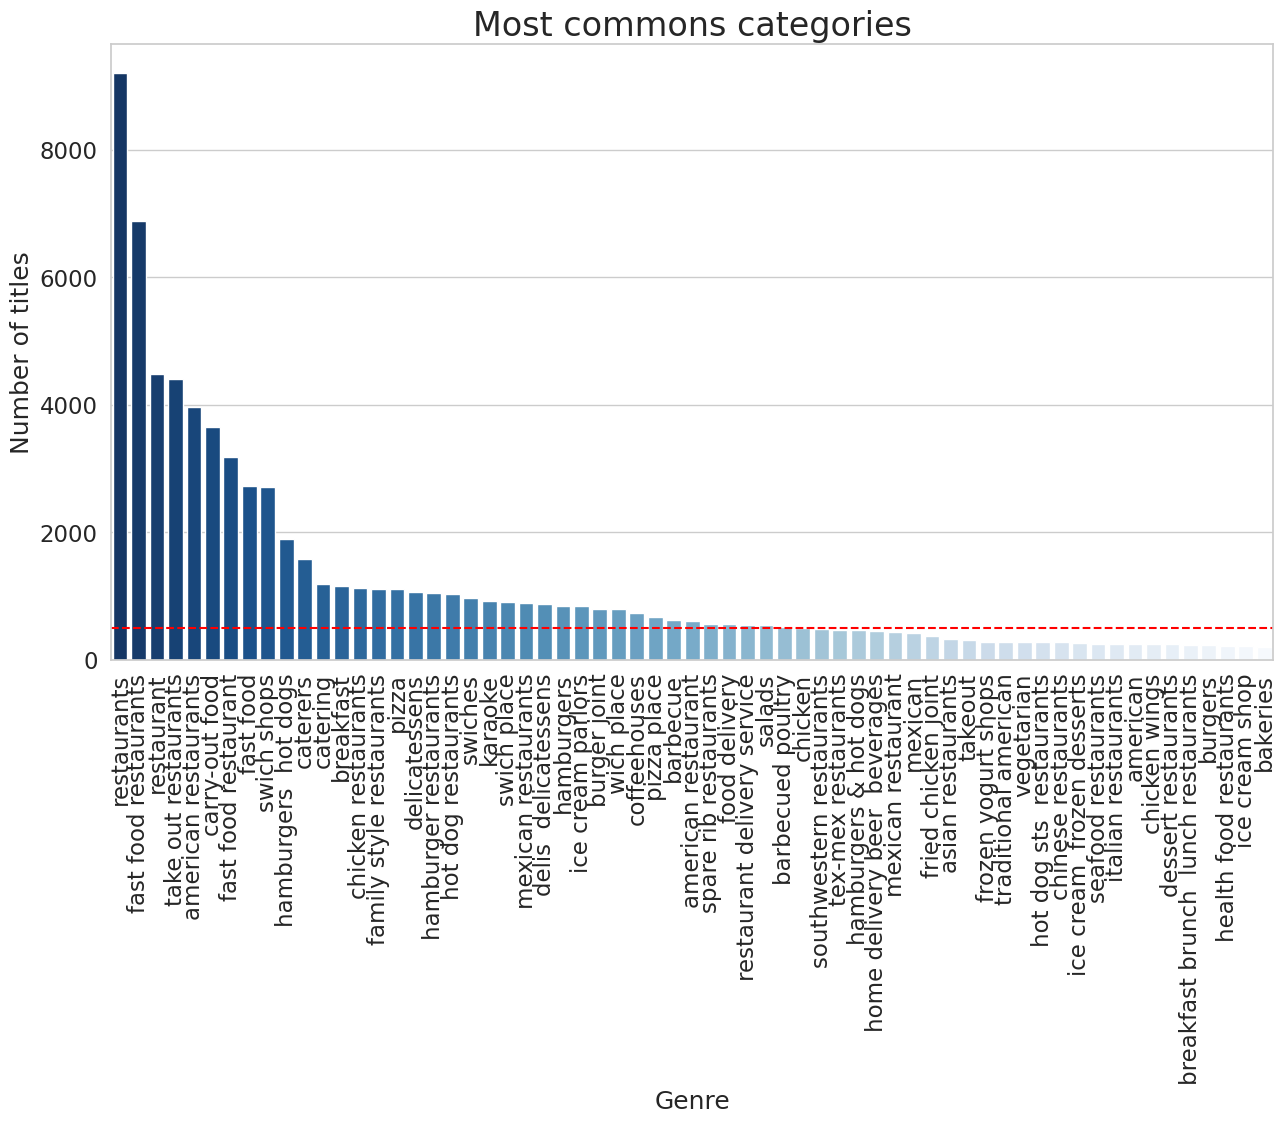

In [ ]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')


pal = sns.color_palette("Blues_r", len(main_categories))
rank = main_categories['count'].argsort().argsort()

sns.barplot(x=main_categories['cat'], y=main_categories['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
rowSums = new_df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

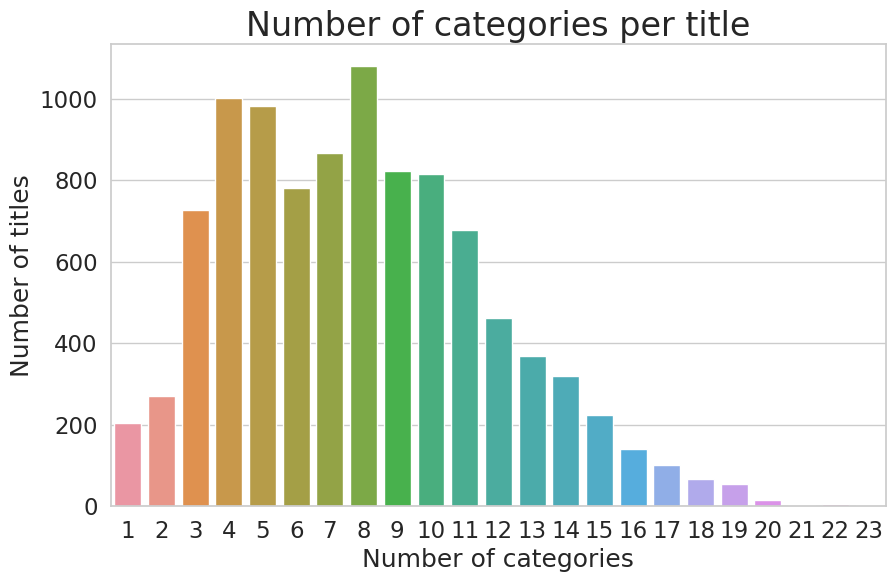

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

sns.barplot(x = multiLabel_counts.index,y = multiLabel_counts.values)
plt.title("Number of categories per title", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)

plt.show()

In [ ]:
boxplot = new_df.copy()
boxplot['len'] = new_df.detailed_adress.apply(lambda x: len(x))

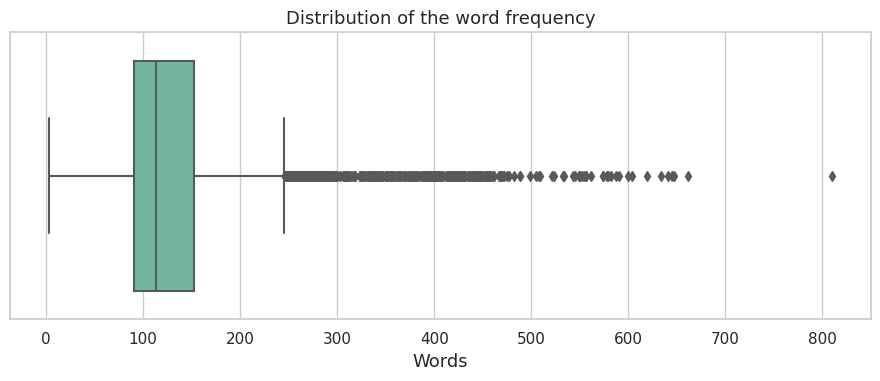

In [ ]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

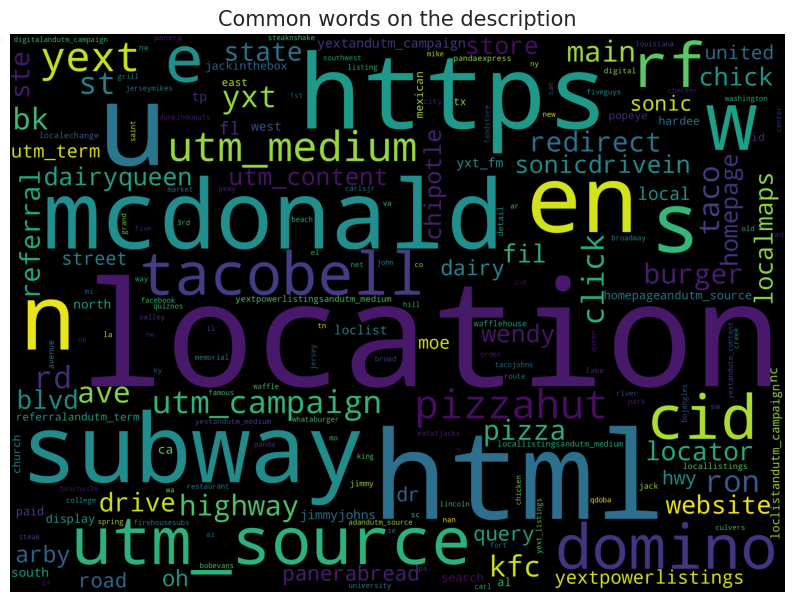

In [ ]:

from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(10,8))
text = new_df.detailed_adress.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=15)
plt.imshow(cloud)

#**NLP Data Preprocessing**

###**Data cleaning**

A]. Cleaning HTML

B]. Remove Punctuation

C]. Remove Numbers

D]. Remove Stopword

E]. Stemming

**A].Cleaning HRML**

In [ ]:
new_df1 = new_df.copy()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
   warnings.simplefilter("ignore")

In [ ]:
#To summarize, the cleanHtml function takes a sentence as input, removes any HTML tags present in the sentence using regular expressions, and returns the cleaned text.
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
new_df1["detailed_adress"]=new_df1["detailed_adress"].apply(cleanHtml)


**B].Remove Punctuation**

In [ ]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip() #The strip() method removes any leading, and trailing whitespaces.
    cleaned = cleaned.replace("\n"," ")
    return cleaned
new_df1["detailed_adress"]=new_df1["detailed_adress"].apply(cleanPunc)

**C]. Remove Numbers**

In [ ]:
def removeNumber(sentence):
  alpha_sent=""
  for word in sentence.split():
    alpha_word=re.sub('[^a-z A-Z]+', ' ', word)
    alpha_sent+=alpha_word
    alpha_sent+=" "
  alpha_sent=alpha_sent.strip()
  return alpha_sent
new_df1['detailed_adress'] = new_df1['detailed_adress'].apply(removeNumber)

**D].Remove Stopwords**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

new_df1['detailed_adress'] =new_df1['detailed_adress'].apply(removeStopWords)
new_df1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,detailed_adress,american,american restaurant,american restaurants,asian restaurants,bakeries,barbecue,barbecued poultry,breakfast,breakfast brunch lunch restaurants,...,seafood restaurants,southwestern restaurants,spare rib restaurants,take out restaurants,takeout,tex-mex restaurants,traditional american,vegetarian,wich place,Others
0,carls jr th avenuegreeleyus provincehttps...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco highway grand junctionus provi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,wich patterson roadgrand junctionus provin...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chipotle mexican grill n salida courtauroraus...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,taco bell e colfax avenuedenverus provinceh...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**E].Lemmatization**

In [ ]:
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def Lemmatizer(sentence):
    lammiSentence = ""
    for word in sentence.split():
        lammi = wordnet_lemmatizer.lemmatize(word)
        lammiSentence += lammi
        lammiSentence += " "
    lammiSentence = lammiSentence.strip()
    return lammiSentence
new_df1['detailed_adress'] =new_df1['detailed_adress'].apply(Lemmatizer)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Train Test Split**

In [ ]:
new_df1

,detailed_adress,american,american restaurant,american restaurants,asian restaurants,bakeries,barbecue,barbecued poultry,breakfast,breakfast brunch lunch restaurants,...,seafood restaurants,southwestern restaurants,spare rib restaurants,take out restaurants,takeout,tex-mex restaurants,traditional american,vegetarian,wich place,Others
0,carls jr th avenuegreeleyus provincehttps www ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,del taco highway grand junctionus provincehttp...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,wich patterson roadgrand junctionus provinceht...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chipotle mexican grill n salida courtauroraus ...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,taco bell e colfax avenuedenverus provincehttp...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,church chicken birmingham carolina avebessemer...,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9996,luxury box cantilever way ste raleighus provin...,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9997,mcdonalds plover rdploverus provincehttp mcdon...,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9998,pizza hut e main sthendersonvilleus provinceht...,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
x = new_df1["detailed_adress"]
y = new_df.drop(["detailed_adress"],axis = 1)

In [ ]:
y.shape

(10000, 64)

**F].Tfidf Vectorization**

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(new_df1,random_state=42,test_size=0.30)
print(train.shape)
print(test.shape)

(7000, 65)
(3000, 65)


In [ ]:
train_text = train["detailed_adress"]
test_text =  test["detailed_adress"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [ ]:
X_train=vectorizer.transform(train_text)
y_train=train.drop(labels=["detailed_adress"],axis=1)
X_test=vectorizer.transform(test_text)
y_test=test.drop(labels=["detailed_adress"],axis=1)

In [ ]:
X_train.shape

(7000, 39159)

In [ ]:
X_test.shape

(3000, 39159)

#**Multi-Label Classification**
 **Multiple Binary Classifications - (One Vs Rest Classifier)**



**Multiple binary classifications - (one vs rest classifier)
One-vs-rest (OvR) is a technique for multi-class classification that involves training one binary classifier for each class in the dataset. The classifier is trained to distinguish the samples of one class from all other samples. When making a prediction, the output of each classifier is considered, and the class with the highest output is selected as the predicted class**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))

    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, train[category])

    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing restaurants comments...**
Test accuracy is 0.9206666666666666


**Processing fast food restaurants comments...**
Test accuracy is 0.7966666666666666


**Processing restaurant comments...**
Test accuracy is 0.714


**Processing take out restaurants comments...**
Test accuracy is 0.8386666666666667


**Processing american restaurants comments...**
Test accuracy is 0.761


**Processing carry-out food comments...**
Test accuracy is 0.747


**Processing fast food restaurant comments...**
Test accuracy is 0.836


**Processing fast food comments...**
Test accuracy is 0.83


**Processing swich shops comments...**
Test accuracy is 0.891


**Processing hamburgers  hot dogs comments...**
Test accuracy is 0.8473333333333334


**Processing caterers comments...**
Test accuracy is 0.8726666666666667


**Processing catering comments...**
Test accuracy is 0.9053333333333333


**Processing breakfast comments...**
Test accuracy is 0.948


**Processing chicken restaurants comments...**
Test a

##**Multiple Binary Classifications - (Binary Relevance)**

**Binary Relevance is a technique for multi-label classification that involves training one binary classifier for each label in the dataset. Any binary classifier can be used with this approach. For example, you could use an SVM classifier or a Naive Bayes classifier 1. The scikit-multilearn library provides an implementation of Binary Relevance that allows you to use any scikit-learn compatible base classifier**



In [ ]:
pip install scikit-multilearn

In [ ]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.035


CPU times: user 4min 56s, sys: 3min 5s, total: 8min 2s
Wall time: 8min 21s


**Classifier Chains**

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression


In [ ]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Accuracy =  0.123


CPU times: user 1h 2min 1s, sys: 7min 49s, total: 1h 9min 50s
Wall time: 46min 6s


**Label Powerset**

In [ ]:
from skmultilearn.problem_transform import LabelPowerset


In [ ]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

**Adapted Algorithm**

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(X_test).toarray()

# train
classifier_new.fit(X_train, y_train)

# predict
predictions_new = classifier_new.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")